In [1]:
import pandas as pd
import numpy as np
from IPython.display import display


# Load the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path, delimiter=';')

# Data cleaning
data['Terakhir'] = data['Terakhir'].str.replace(',', '.').astype(float)
data['Pembukaan'] = data['Pembukaan'].str.replace(',', '.').astype(float)
data['Tertinggi'] = data['Tertinggi'].str.replace(',', '.').astype(float)
data['Terendah'] = data['Terendah'].str.replace(',', '.').astype(float)
data['Perubahan%'] = data['Perubahan%'].str.replace('%', '').str.replace(',', '.').astype(float)
data['Vol.'] = data['Vol.'].str.replace('K', '').str.replace(',', '.').astype(float) * 1000

# Convert 'Tanggal' to datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y')
data = data.sort_values('Tanggal')  # Ensure data is sorted by date
data.set_index('Tanggal', inplace=True)

# Set frequency of the datetime index
data = data.asfreq('B')  # Assuming the data frequency is business days

# Fill missing values with the mean of each column
data.fillna(data.mean(), inplace=True)

print("Data after cleaning and preprocessing:")
display(data)


C:\Users\Hizamrul\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Data after cleaning and preprocessing:


,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
Tanggal,,,,,,
2024-04-30,18.890000,19.105000,19.150000,18.850000,150.000000,-1.100000
2024-05-01,18.970000,19.085000,19.165000,19.085000,20.000000,0.420000
2024-05-02,18.170000,18.445000,18.445000,18.300000,10.000000,-4.220000
2024-05-03,18.740000,18.650000,18.650000,18.650000,0.000000,3.140000
2024-05-06,18.405000,18.400000,18.420000,18.180000,10.000000,-1.790000
2024-05-07,18.295000,18.405000,18.405000,18.405000,0.000000,-0.600000
2024-05-08,18.315000,18.400000,18.483000,18.395000,224.705882,0.110000
2024-05-09,18.685000,18.440000,19.005000,18.440000,224.705882,2.020000
2024-05-10,19.255000,18.760000,18.840000,18.760000,0.000000,3.050000


In [3]:
# Configuration dictionary
config = {
    'target': 'Terakhir',
    'exogenous': ['Harga_Pupuk', 'Cuaca', 'Produksi'],
}

# Create dummy data for new exogenous factors
np.random.seed(42)
data['Harga_Pupuk'] = np.random.uniform(100, 200, size=len(data))
data['Cuaca'] = np.random.uniform(0, 100, size=len(data))  # Assuming cuaca is some numerical scale
data['Produksi'] = np.random.uniform(500, 1500, size=len(data))

# Prepare data
y = data[config['target']]
X = data[config['exogenous']]

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]

print("Training and Testing data shapes:")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


display(data)


Training and Testing data shapes:
y_train: (17,), y_test: (5,)
X_train: (17, 3), X_test: (5, 3)


,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Harga_Pupuk,Cuaca,Produksi
Tanggal,,,,,,,,,
2024-04-30,18.890000,19.105000,19.150000,18.850000,150.000000,-1.100000,137.454012,29.214465,758.779982
2024-05-01,18.970000,19.085000,19.165000,19.085000,20.000000,0.420000,195.071431,36.636184,1162.522284
2024-05-02,18.170000,18.445000,18.445000,18.300000,10.000000,-4.220000,173.199394,45.606998,811.711076
2024-05-03,18.740000,18.650000,18.650000,18.650000,0.000000,3.140000,159.865848,78.517596,1020.068021
2024-05-06,18.405000,18.400000,18.420000,18.180000,10.000000,-1.790000,115.601864,19.967378,1046.710279
2024-05-07,18.295000,18.405000,18.405000,18.405000,0.000000,-0.600000,115.599452,51.423444,684.854456
2024-05-08,18.315000,18.400000,18.483000,18.395000,224.705882,0.110000,105.808361,59.241457,1469.584628
2024-05-09,18.685000,18.440000,19.005000,18.440000,224.705882,2.020000,186.617615,4.645041,1275.132823
2024-05-10,19.255000,18.760000,18.840000,18.760000,0.000000,3.050000,160.111501,60.754485,1439.498942


Testing ARIMA parameters: (1, 1, 1)

ARIMA params: p=1, d=1, q=1
y_diff head: Tanggal
2024-05-01    0.080
2024-05-02   -0.800
2024-05-03    0.570
2024-05-06   -0.335
2024-05-07   -0.110
Freq: B, Name: Terakhir, dtype: float64
y_pred head: Tanggal
2024-05-01    18.970
2024-05-02    18.330
2024-05-03    17.140
2024-05-06    19.705
2024-05-07    16.025
Freq: B, dtype: float64
Score for parameters (1, 1, 1): 1.673262499999971
Testing ARIMA parameters: (1, 1, 2)

ARIMA params: p=1, d=1, q=2
y_diff head: Tanggal
2024-05-01    0.080
2024-05-02   -0.800
2024-05-03    0.570
2024-05-06   -0.335
2024-05-07   -0.110
Freq: B, Name: Terakhir, dtype: float64
y_pred head: Tanggal
2024-05-01    18.970
2024-05-02    18.170
2024-05-03    17.220
2024-05-06    18.745
2024-05-07    18.195
Freq: B, dtype: float64
Score for parameters (1, 1, 2): 0.509356249999997
Testing ARIMA parameters: (1, 1, 3)

ARIMA params: p=1, d=1, q=3
y_diff head: Tanggal
2024-05-01    0.080
2024-05-02   -0.800
2024-05-03    0.570
20

,Actual,Predicted,Difference,Percentage Difference
Tanggal,,,,
2024-05-24,18.340000,18.340000,0.0,0.0
2024-05-27,18.620857,18.620857,0.0,0.0
2024-05-28,18.090000,18.090000,0.0,0.0
2024-05-29,17.823000,17.823000,0.0,0.0


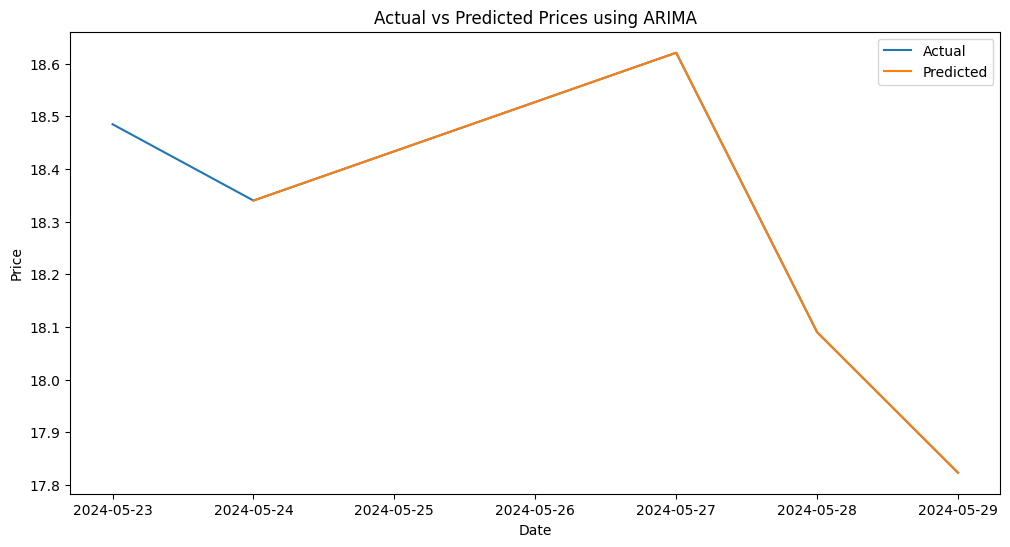

In [4]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate ARIMA manually
def arima_predict(y, p, d, q):
    y_diff = y.diff(d).dropna()
    y_pred = pd.Series([0.0] * len(y_diff), index=y_diff.index)  # Initialize y_pred with zeros and float type

    print(f"\nARIMA params: p={p}, d={d}, q={q}")
    print(f"y_diff head: {y_diff.head()}")

    for t in range(max(p, q), len(y_diff)):
        AR_term = sum([y_diff.iloc[t-i-1] for i in range(p)])
        MA_term = sum([(y_diff.iloc[t-i-1] - y_pred.iloc[t-i-1]) for i in range(q)])
        y_pred.iloc[t] = AR_term + MA_term

    y_pred = y_pred.cumsum() + y.iloc[d:len(y_pred)+d].values  # Adjust y to match the length of y_pred
    print(f"y_pred head: {y_pred.head()}")
    
    # Check if all values in y_pred are zero
    if all(y_pred == 0):
        print(f"Skipping parameters p={p}, d={d}, q={q} due to zero prediction")
        return None  # Indicate invalid prediction
    
    return y_pred

# Grid search for best ARIMA parameters
p_values = range(1, 5)
d_values = range(1, 5)
q_values = range(1, 5)

best_score_arima = float('inf')
best_params_arima = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            params = (p, d, q)
            print(f"Testing ARIMA parameters: {params}")
            try:
                y_pred_train = arima_predict(y_train, p, d, q)
                if y_pred_train is None:  # Skip if prediction is invalid
                    continue
                score = mean_squared_error(y_train.iloc[d:len(y_pred_train)+d], y_pred_train)
                print(f"Score for parameters {params}: {score}")
                if score < best_score_arima and score != 0.0:  # Avoid zero scores
                    best_score_arima = score
                    best_params_arima = params
            except Exception as e:
                print(f"Error with ARIMA parameters {params}: {e}")
                continue

# Print the best parameters
print("Best ARIMA parameters found:")
print(best_params_arima)

# Predict on the test set using the best parameters
p, d, q = best_params_arima
y_pred_test = arima_predict(y_test, p, d, q)

# Calculate the differences
differences = y_test.iloc[d:] - y_pred_test
percentage_diff = (differences / y_test.iloc[d:]) * 100

# Print the results
results = pd.DataFrame({
    'Actual': y_test.iloc[d:],
    'Predicted': y_pred_test,
    'Difference': differences,
    'Percentage Difference': percentage_diff
})
display(results)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index[d:], y_pred_test, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices using ARIMA')
plt.legend()
plt.show()


Testing Seasonal ARIMA parameters: (1, 1, 0, 1, 1, 1, 3)

Seasonal ARIMA params: p=1, d=1, q=0, P=1, D=1, Q=1, m=3
y_diff head: Tanggal
2024-05-01    0.080
2024-05-02   -0.800
2024-05-03    0.570
2024-05-06   -0.335
2024-05-07   -0.110
Freq: B, Name: Terakhir, dtype: float64
y_pred head: Tanggal
2024-05-01    18.970
2024-05-02    18.170
2024-05-03    18.740
2024-05-06    19.135
2024-05-07    17.090
Freq: B, dtype: float64
Score for parameters (1, 1, 0, 1, 1, 1, 3): 0.72350624999999
Testing Seasonal ARIMA parameters: (1, 1, 0, 1, 1, 2, 3)

Seasonal ARIMA params: p=1, d=1, q=0, P=1, D=1, Q=2, m=3
y_diff head: Tanggal
2024-05-01    0.080
2024-05-02   -0.800
2024-05-03    0.570
2024-05-06   -0.335
2024-05-07   -0.110
Freq: B, Name: Terakhir, dtype: float64
y_pred head: Tanggal
2024-05-01    18.970
2024-05-02    18.170
2024-05-03    18.740
2024-05-06    18.405
2024-05-07    18.295
Freq: B, dtype: float64
Score for parameters (1, 1, 0, 1, 1, 2, 3): 0.571529687499998
Testing Seasonal ARIMA pa

,Actual,Predicted,Difference,Percentage Difference
Tanggal,,,,
2024-05-24,18.340000,18.340000,0.0,0.0
2024-05-27,18.620857,18.620857,0.0,0.0
2024-05-28,18.090000,18.090000,0.0,0.0
2024-05-29,17.823000,17.823000,0.0,0.0


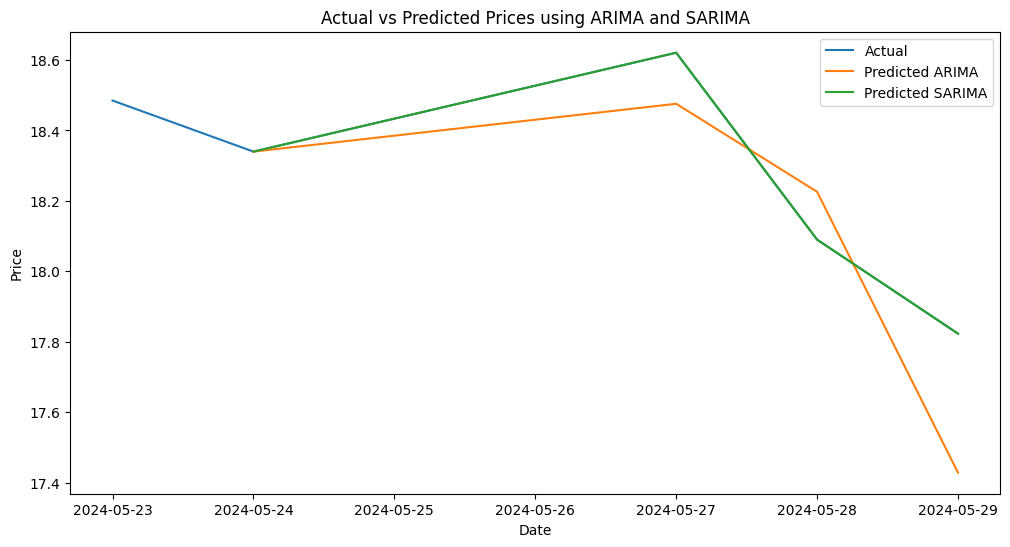

In [18]:
# Function to calculate seasonal ARIMA manually
def seasonal_predict(y, p, d, q, P, D, Q, m):
    y_diff = y.diff(d).dropna()
    y_pred = pd.Series([0.0] * len(y_diff), index=y_diff.index)  # Initialize y_pred with zeros and float type

    print(f"\nSeasonal ARIMA params: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, m={m}")
    print(f"y_diff head: {y_diff.head()}")

    for t in range(max(p, q, P*m, Q*m), len(y_diff)):
        AR_term = sum([y_diff.iloc[t-i-1] for i in range(p)])
        MA_term = sum([(y_diff.iloc[t-i-1] - y_pred.iloc[t-i-1]) for i in range(q)])
        Seasonal_AR_term = sum([y_diff.iloc[t-(i+1)*m] for i in range(P)])
        Seasonal_MA_term = sum([(y_diff.iloc[t-(i+1)*m] - y_pred.iloc[t-(i+1)*m]) for i in range(Q)])
        y_pred.iloc[t] = AR_term + MA_term + Seasonal_AR_term + Seasonal_MA_term

    y_pred = y_pred.cumsum() + y.iloc[d:len(y_pred)+d].values  # Adjust y to match the length of y_pred
    print(f"y_pred head: {y_pred.head()}")
    
    # Check if all values in y_pred are zero
    if all(y_pred == 0):
        print(f"Skipping parameters p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, m={m} due to zero prediction")
        return None  # Indicate invalid prediction
    
    return y_pred

# Example of best ARIMA params from previous step, you need to replace it with actual best ARIMA params
p, d, q = best_params_arima[0], best_params_arima[1], best_params_arima[2]  # Best parameters found for ARIMA

P_values = range(1, 4)  # Extend range for better optimization
D_values = range(1, 5)
Q_values = range(1, 5)  # Start Q_values from 1 to avoid (0, 0, 0)
m = 3  # Seasonal period

best_score_seasonal = float('inf')
best_params_seasonal = None
valid_scores = []

for P in P_values:
    for D in D_values:
        for Q in Q_values:
            params = (p, d, q, P, D, Q, m)
            print(f"Testing Seasonal ARIMA parameters: {params}")
            try:
                y_pred_train = seasonal_predict(y_train, p, d, q, P, D, Q, m)
                if y_pred_train is None:  # Skip if prediction is invalid
                    continue
                score = mean_squared_error(y_train.iloc[d:len(y_pred_train)+d], y_pred_train)
                print(f"Score for parameters {params}: {score}")
                if score != 0.0:  # Only consider non-zero scores
                    valid_scores.append((params, score))
                    if score < best_score_seasonal:
                        best_score_seasonal = score
                        best_params_seasonal = params
            except Exception as e:
                print(f"Error with Seasonal ARIMA parameters {params}: {e}")
                continue

# Print all valid scores
print("\nAll valid Seasonal ARIMA parameters and their MSE:")
for params, score in valid_scores:
    param_str = ",".join(map(str, params))
    print(f"Parameters: {param_str} | MSE: {score}")

# Print the best seasonal parameters
print("\nBest Seasonal ARIMA parameters found:")
param_str = ",".join(map(str, best_params_seasonal))
print(f"Parameters: {param_str} | MSE: {best_score_seasonal}")

# Predict on the test set using the best seasonal parameters
p, d, q, P, D, Q, m = best_params_seasonal
y_pred_sarima = seasonal_predict(y_test, p, d, q, P, D, Q, m)

# Calculate the differences
differences = y_test.iloc[d:] - y_pred_sarima
percentage_diff = (differences / y_test.iloc[d:]) * 100

# Print the results
results_sarima = pd.DataFrame({
    'Actual': y_test.iloc[d:],
    'Predicted': y_pred_sarima,
    'Difference': differences,
    'Percentage Difference': percentage_diff
})
display(results_sarima)

# # Plot the results
# plt.figure(figsize=(12, 6))
# plt.plot(y_test.index, y_test, label='Actual')
# plt.plot(y_test.index[d:], y_pred_sarima, label='Predicted SARIMA')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.title('Actual vs Predicted Prices using SARIMA')
# plt.legend()
# plt.show()

# Combined plot of ARIMA and SARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index[d:], y_pred_test, label='Predicted ARIMA')
plt.plot(y_test.index[d:], y_pred_sarima, label='Predicted SARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices using ARIMA and SARIMA')
plt.legend()
plt.show()



SARIMAX params: p=1, d=1, q=0, P=1, D=0, Q=3, m=3
y_diff head: Tanggal
2024-05-24   -0.145000
2024-05-27    0.280857
2024-05-28   -0.530857
2024-05-29   -0.267000
Freq: B, Name: Terakhir, dtype: float64
y_pred head: Tanggal
2024-05-24    18.340000
2024-05-27    18.620857
2024-05-28    18.090000
2024-05-29    17.823000
Freq: B, dtype: float64


,Actual,Predicted SARIMAX,Difference,Percentage Difference
Tanggal,,,,
2024-05-24,18.340000,18.340000,0.0,0.0
2024-05-27,18.620857,18.620857,0.0,0.0
2024-05-28,18.090000,18.090000,0.0,0.0
2024-05-29,17.823000,17.823000,0.0,0.0


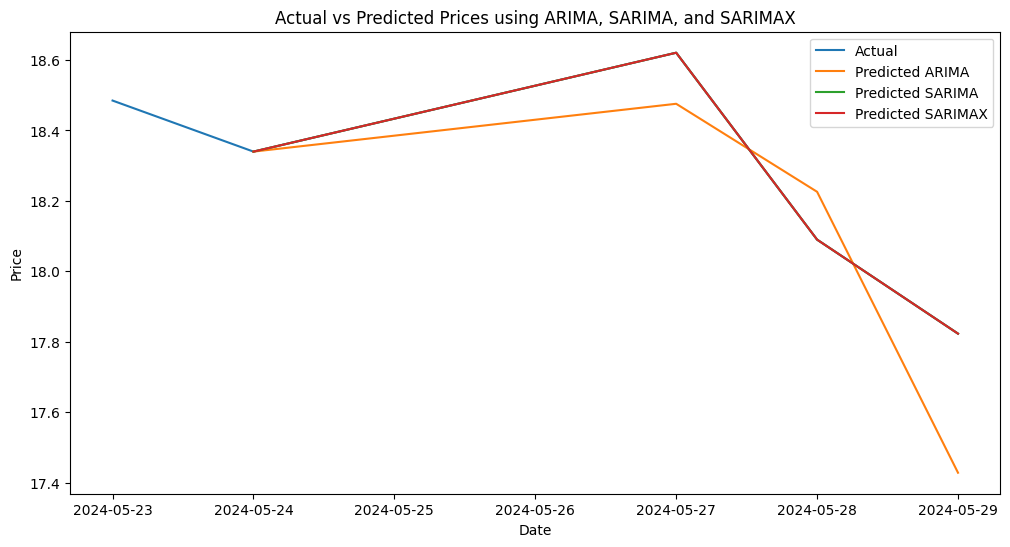

In [16]:
# Function to calculate SARIMAX manually
def sarimax_predict(y, X, p, d, q, P, D, Q, m):
    y_diff = y.diff(d).dropna()
    y_pred = pd.Series([0.0] * len(y_diff), index=y_diff.index)  # Initialize y_pred with zeros and float type

    print(f"\nSARIMAX params: p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, m={m}")
    print(f"y_diff head: {y_diff.head()}")

    for t in range(max(p, q, P*m, Q*m), len(y_diff)):
        AR_term = sum([y_diff.iloc[t-i-1] for i in range(p)])
        MA_term = sum([(y_diff.iloc[t-i-1] - y_pred.iloc[t-i-1]) for i in range(q)])
        Seasonal_AR_term = sum([y_diff.iloc[t-(i+1)*m] for i in range(P)])
        Seasonal_MA_term = sum([(y_diff.iloc[t-(i+1)*m] - y_pred.iloc[t-(i+1)*m]) for i in range(Q)])
        Exog_term = sum([X.iloc[t, i] for i in range(len(X.columns))])
        y_pred.iloc[t] = AR_term + MA_term + Seasonal_AR_term + Seasonal_MA_term + Exog_term

    y_pred = y_pred.cumsum() + y.iloc[d:len(y_pred)+d].values  # Adjust y to match the length of y_pred
    print(f"y_pred head: {y_pred.head()}")
    
    # Check if all values in y_pred are zero
    if all(y_pred == 0):
        print(f"Skipping parameters p={p}, d={d}, q={q}, P={P}, D={D}, Q={Q}, m={m} due to zero prediction")
        return None  # Indicate invalid prediction
    
    return y_pred

# Example of best ARIMA and SARIMA params from previous steps
p, d, q = best_params_arima[0], best_params_arima[1], best_params_arima[2]  # Best parameters found for ARIMA
P, D, Q, m = best_params_seasonal[3], best_params_seasonal[4], best_params_seasonal[5], best_params_seasonal[6]  # Best parameters found for SARIMA

# Predict on the test set using the best SARIMAX parameters
y_pred_sarimax = sarimax_predict(y_test, X_test, p, d, q, P, D, Q, m)

# Calculate the differences
differences_sarimax = y_test.iloc[d:] - y_pred_sarimax
percentage_diff_sarimax = (differences_sarimax / y_test.iloc[d:]) * 100

# Print the results
results_sarimax = pd.DataFrame({
    'Actual': y_test.iloc[d:],
    'Predicted SARIMAX': y_pred_sarimax,
    'Difference': differences_sarimax,
    'Percentage Difference': percentage_diff_sarimax
})
display(results_sarimax)

# # Plot the results
# plt.figure(figsize=(12, 6))
# plt.plot(y_test.index, y_test, label='Actual')
# plt.plot(y_test.index[d:], y_pred_sarimax, label='Predicted SARIMAX')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.title('Actual vs Predicted Prices using SARIMAX')
# plt.legend()
# plt.show()

# Combined plot of ARIMA, SARIMA, and SARIMAX predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index[d:], y_pred_test, label='Predicted ARIMA')
plt.plot(y_test.index[d:], y_pred_sarima, label='Predicted SARIMA')
plt.plot(y_test.index[d:], y_pred_sarimax, label='Predicted SARIMAX')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices using ARIMA, SARIMA, and SARIMAX')
plt.legend()
plt.show()


In [13]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

# Example parameters, these should be the best parameters found
p, d, q = best_params_arima[0], best_params_arima[1], best_params_arima[2]  
P, D, Q, m = best_params_seasonal[3], best_params_seasonal[4], best_params_seasonal[5], best_params_seasonal[6]  

# Predict on the test set using the best SARIMAX parameters
y_pred_sarimax = sarimax_predict(y_test, X_test, p, d, q, P, D, Q, m)

# Create a DataFrame to store the results
results_sarimax = pd.DataFrame({
    'Actual': y_test.iloc[d:],
    'Predicted_SARIMAX': y_pred_sarimax
})
results_sarimax['Difference'] = results_sarimax['Actual'] - results_sarimax['Predicted_SARIMAX']
results_sarimax['Percentage_Difference'] = (results_sarimax['Difference'] / results_sarimax['Actual']) * 100

# Save the results to an Excel file with formulas for Difference and Percentage Difference
output_file = 'sarimax_predictions.xlsx'
workbook = Workbook()
worksheet = workbook.active
worksheet.title = 'SARIMAX_Predictions'


print(results_sarimax)

# # Append DataFrame to the worksheet
# for r_idx, row in enumerate(dataframe_to_rows(results_sarimax, index=True, header=True), 1):
#     for c_idx, value in enumerate(row, 1):
#         worksheet.cell(row=r_idx, column=c_idx, value=value)

# # Adding formulas for AR, MA, seasonal AR, and seasonal MA terms
# for row in range(2, len(results_sarimax) + 2):
#     # Calculate AR term
#     ar_formula = '+'.join([f'C{row-i}' for i in range(1, p+1)])
#     worksheet[f'F{row}'] = f'={ar_formula}'
    
#     # Calculate MA term
#     ma_formula = '+'.join([f'(B{row-i}-C{row-i})' for i in range(1, q+1)])
#     worksheet[f'G{row}'] = f'={ma_formula}'
    
#     # Calculate seasonal AR term
#     seasonal_ar_formula = '+'.join([f'C{row-(i*m)}' for i in range(1, P+1)])
#     worksheet[f'H{row}'] = f'={seasonal_ar_formula}'
    
#     # Calculate seasonal MA term
#     seasonal_ma_formula = '+'.join([f'(B{row-(i*m)}-C{row-(i*m)})' for i in range(1, Q+1)])
#     worksheet[f'I{row}'] = f'={seasonal_ma_formula}'
    
#     # Calculate exogenous term
#     exog_formula = '+'.join([f'J{row}', f'K{row}', f'L{row}'])
#     worksheet[f'J{row}'] = f'={exog_formula}'
    
#     # Sum all terms to get the prediction
#     worksheet[f'C{row}'] = f'=F{row}+G{row}+H{row}+I{row}+J{row}'
    
#     # Formula for Difference
#     worksheet[f'D{row}'] = f'=B{row}-C{row}'
    
#     # Formula for Percentage Difference
#     worksheet[f'E{row}'] = f'=D{row}/B{row}*100'

# workbook.save(output_file)

# print(f"Results saved to {output_file}")



SARIMAX params: p=1, d=1, q=0, P=1, D=0, Q=3, m=3
y_diff head: Tanggal
2024-05-24   -0.145000
2024-05-27    0.280857
2024-05-28   -0.530857
2024-05-29   -0.267000
Freq: B, Name: Terakhir, dtype: float64
y_pred head: Tanggal
2024-05-24    18.340000
2024-05-27    18.620857
2024-05-28    18.090000
2024-05-29    17.823000
Freq: B, dtype: float64
               Actual  Predicted_SARIMAX  Difference  Percentage_Difference
Tanggal                                                                    
2024-05-24  18.340000          18.340000         0.0                    0.0
2024-05-27  18.620857          18.620857         0.0                    0.0
2024-05-28  18.090000          18.090000         0.0                    0.0
2024-05-29  17.823000          17.823000         0.0                    0.0
